<a href="https://colab.research.google.com/github/RKrosnicki/US_Honey_Project/blob/main/Honey_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("/content/US_honey_dataset_updated.csv", index_col = 0)
df.head()

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,Alabama,16000,58,928000,28000,62.0,575000,1995
1,Arizona,52000,79,4108000,986000,68.0,2793000,1995
2,Arkansas,50000,60,3000000,900000,64.0,1920000,1995
3,California,420000,93,39060000,4687000,60.0,23436000,1995
4,Colorado,45000,60,2700000,1404000,68.0,1836000,1995


In [5]:
df.tail(10)

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
1105,SouthDakota,250000,49,5268000,5268000,2.27,27808000,2021
1106,Tennessee,8000,56,81000,81000,5.00,2240000,2021
1107,Texas,137000,56,384000,384000,2.30,17646000,2021
1108,Utah,31000,33,92000,92000,2.18,2230000,2021
1109,Vermont,7000,47,76000,76000,3.28,1079000,2021
1110,Virginia,6000,40,79000,79000,8.23,1975000,2021
1111,Washington,96000,32,1206000,1206000,2.52,7741000,2021
1112,WestVirginia,6000,43,136000,136000,4.80,1238000,2021
1113,Wisconsin,42000,47,750000,750000,2.81,5547000,2021
1114,Wyoming,38000,58,242000,242000,2.07,4562000,2021


In [6]:
df.loc[df['year'] >= 2018, 'average_price'] = df['average_price']*100

In [7]:
df.tail(10)

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
1105,SouthDakota,250000,49,5268000,5268000,227.0,27808000,2021
1106,Tennessee,8000,56,81000,81000,500.0,2240000,2021
1107,Texas,137000,56,384000,384000,230.0,17646000,2021
1108,Utah,31000,33,92000,92000,218.0,2230000,2021
1109,Vermont,7000,47,76000,76000,328.0,1079000,2021
1110,Virginia,6000,40,79000,79000,823.0,1975000,2021
1111,Washington,96000,32,1206000,1206000,252.0,7741000,2021
1112,WestVirginia,6000,43,136000,136000,480.0,1238000,2021
1113,Wisconsin,42000,47,750000,750000,281.0,5547000,2021
1114,Wyoming,38000,58,242000,242000,207.0,4562000,2021


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1115 entries, 0 to 1114
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   state                1115 non-null   object 
 1   colonies_number      1115 non-null   int64  
 2   yield_per_colony     1115 non-null   int64  
 3   production           1115 non-null   int64  
 4   stocks               1115 non-null   int64  
 5   average_price        1115 non-null   float64
 6   value_of_production  1115 non-null   int64  
 7   year                 1115 non-null   int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 110.7+ KB


In [9]:
df.isnull().sum()

state                  0
colonies_number        0
yield_per_colony       0
production             0
stocks                 0
average_price          0
value_of_production    0
year                   0
dtype: int64

In [10]:
df.describe()

,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
count,1115.000000,1115.000000,1.115000e+03,1.115000e+03,1115.000000,1.115000e+03,1115.000000
mean,62438.565022,59.743498,2.851268e+06,1.172625e+06,184.638565,5.667412e+06,2007.740807
std,92648.175955,19.940500,5.561202e+06,2.049556e+06,116.644249,9.459460e+06,7.823002
min,2000.000000,19.000000,1.200000e+04,9.000000e+03,49.000000,1.060000e+05,1995.000000
25%,9000.000000,45.000000,2.460000e+05,1.125000e+05,102.500000,1.008000e+06,2001.000000
50%,26000.000000,57.000000,8.280000e+05,3.700000e+05,155.000000,2.281000e+06,2008.000000
75%,69000.000000,71.000000,2.700000e+06,1.253500e+06,223.000000,5.704000e+06,2015.000000
max,550000.000000,155.000000,3.906000e+07,1.354500e+07,874.000000,8.385900e+07,2021.000000


<Axes: >

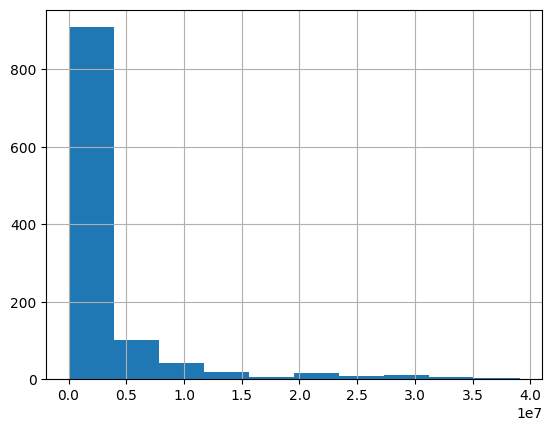

In [11]:
df['production'].hist()

<Axes: >

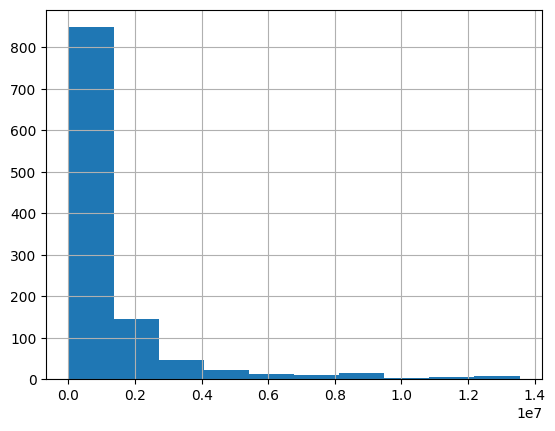

In [12]:
df['stocks'].hist()

In [13]:
print(df.corr().round(2))

                     colonies_number  yield_per_colony  production  stocks  \
colonies_number                 1.00              0.20        0.74    0.80   
yield_per_colony                0.20              1.00        0.41    0.34   
production                      0.74              0.41        1.00    0.81   
stocks                          0.80              0.34        0.81    1.00   
average_price                  -0.21             -0.41       -0.33   -0.27   
value_of_production             0.91              0.21        0.52    0.69   
year                            0.03             -0.33       -0.28   -0.11   

                     average_price  value_of_production  year  
colonies_number              -0.21                 0.91  0.03  
yield_per_colony             -0.41                 0.21 -0.33  
production                   -0.33                 0.52 -0.28  
stocks                       -0.27                 0.69 -0.11  
average_price                 1.00                -0.06

<ipython-input-13-4f6e1543af8a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr().round(2))


In [14]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
transformed = enc.fit_transform(df[['state']])
print(transformed.toarray())

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [15]:
df_cat = df['state']
df_cat = pd.get_dummies(data=df_cat)
df_cat = df.join(df_cat)
#df_cat = df_cat.drop(['state'], axis=1) #usuniecie oryginalnych zmiennych kategorycznych
df_cat.sample(15)

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year,Alabama,Arizona,...,SouthDakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,WestVirginia,Wisconsin,Wyoming
728,Kansas,6000,55,125000,125000,228.0,752000,2012,0,0,...,0,0,0,0,0,0,0,0,0,0
838,California,275000,30,1485000,1485000,203.0,16748000,2015,0,0,...,0,0,0,0,0,0,0,0,0,0
726,Indiana,8000,59,203000,203000,254.0,1199000,2012,0,0,...,0,0,0,0,0,0,0,0,0,0
416,NorthCarolina,9000,40,360000,72000,218.0,785000,2004,0,0,...,0,0,0,0,0,0,0,0,0,0
811,Michigan,91000,63,1835000,1835000,249.0,14275000,2014,0,0,...,0,0,0,0,0,0,0,0,0,0
546,Texas,105000,82,8610000,1550000,95.0,8180000,2007,0,0,...,0,0,1,0,0,0,0,0,0,0
658,NewJersey,13000,35,73000,73000,190.0,865000,2010,0,0,...,0,0,0,0,0,0,0,0,0,0
897,NewJersey,12000,27,198000,198000,709.0,2297000,2016,0,0,...,0,0,0,0,0,0,0,0,0,0
553,Wyoming,43000,80,3440000,894000,103.0,3543000,2007,0,0,...,0,0,0,0,0,0,0,0,0,1
279,Mississippi,17000,66,1122000,224000,60.0,673000,2001,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from scipy.stats import normaltest
from sklearn.metrics import r2_score

In [17]:
X = df[['colonies_number', 'yield_per_colony', 'stocks', 'average_price', 'value_of_production', 'state']]

In [18]:
y = df['production']

In [19]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [20]:
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size = 0.25, random_state=3)

In [21]:
print(X.shape, y.shape)

(1115, 6) (1115,)


In [22]:
print(X_train.shape, y_train.shape)

(669, 6) (669,)


In [23]:
print([X_test.shape, y_test.shape],[X_val.shape, y_val.shape])

[(223, 6), (223,)] [(223, 6), (223,)]


In [24]:
cols_numerical = ['colonies_number', 'yield_per_colony', 'stocks', 'average_price', 'value_of_production']

In [25]:
cols_categorical = ['state']

In [26]:
# class HoneyDataset(BaseEstimator, TransformerMixin):
#   def fit(self, X, y=None):
#     self.sizep90 = X['stocks'].quantile(0.90)
#     self.sizemean = X['stocks'].mean()

#     return self

#   def transform(self, X, y=None):
#     X[X['stocks'] > self.sizep90] = self.sizemean

#     return X

In [27]:
transformer_numerical = Pipeline(steps = [
    # ('outlier', HoneyDataset() ),
    ('imputer', SimpleImputer(strategy = 'mean')),
    ('scaler', StandardScaler())
])

In [28]:
transformer_categorical = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('onehotenc', OneHotEncoder())
])

In [29]:
preprocessor = ColumnTransformer(transformers =[
    ('numerical', transformer_numerical, cols_numerical),
    ('categorical', transformer_categorical, cols_categorical)
])

In [30]:
from pandas.core.common import random_state
pipe = Pipeline(steps =[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

In [31]:
preprocessor

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['colonies_number', 'yield_per_colony',
                                  'stocks', 'average_price',
                                  'value_of_production']),
                                ('categorical',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotenc',
                                                  OneHotEncoder())]),
                                 ['state'])])

In [32]:
pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['colonies_number',
                                                   'yield_per_colony', 'stocks',
                                                   'average_price',
                                                   'value_of_production']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotenc',
                                                                   OneHotEncoder())]),
                                                  ['state'])])),
                ('model', LinearRegression())])

In [33]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['colonies_number',
                                                   'yield_per_colony', 'stocks',
                                                   'average_price',
                                                   'value_of_production']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotenc',
                                                                   OneHotEncoder())]),
                                                  ['state'])])),
                ('model', LinearRegression())])

In [34]:
y_pred_train = pipe.predict(X_train)

In [35]:
r2_train = r2_score(y_train, y_pred_train)
r2_train

0.8625988500828867

In [36]:
y_pred_val = pipe.predict(X_val)

In [37]:
r2_train = r2_score(y_val, y_pred_val)
r2_train

0.8247770127899929

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
regressors = [
    DummyRegressor(strategy="mean"),
    LinearRegression(),
    DecisionTreeRegressor()

]

In [40]:
scalers = [StandardScaler(),
           MinMaxScaler()]

In [41]:
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', None)
])

In [42]:
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocessor', 'model', 'preprocessor__n_jobs', 'preprocessor__remainder', 'preprocessor__sparse_threshold', 'preprocessor__transformer_weights', 'preprocessor__transformers', 'preprocessor__verbose', 'preprocessor__verbose_feature_names_out', 'preprocessor__numerical', 'preprocessor__categorical', 'preprocessor__numerical__memory', 'preprocessor__numerical__steps', 'preprocessor__numerical__verbose', 'preprocessor__numerical__imputer', 'preprocessor__numerical__scaler', 'preprocessor__numerical__imputer__add_indicator', 'preprocessor__numerical__imputer__copy', 'preprocessor__numerical__imputer__fill_value', 'preprocessor__numerical__imputer__keep_empty_features', 'preprocessor__numerical__imputer__missing_values', 'preprocessor__numerical__imputer__strategy', 'preprocessor__numerical__imputer__verbose', 'preprocessor__numerical__scaler__copy', 'preprocessor__numerical__scaler__with_mean', 'preprocessor__numerical__scaler__with_std', 'preproce

In [43]:
import time
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import max_error

In [44]:
models_df = pd.DataFrame()

for model in regressors:
  for scaler in scalers:

    pipe_params = {
        'preprocessor__numerical__scaler': scaler,
        'model': model
    }

    pipe.set_params(**pipe_params)

    #training
    start_time = time.time()
    pipe.fit(X_train, y_train)
    end_time = time.time()

    y_pred_train = pipe.predict(X_train)  #do prediction in train dataset with pipeline
    y_pred_val = pipe.predict(X_val)  #do prediction in val dataset with pipeline

    #count metric for train and val
    r2_train = r2_score(y_train, y_pred_train)
    r2_val = r2_score(y_val, y_pred_val)

    mae_train = mean_absolute_percentage_error(y_train, y_pred_train)
    mae_val = mean_absolute_percentage_error(y_val, y_pred_val)

    mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
    mape_val = mean_absolute_percentage_error(y_val, y_pred_val)

    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_val = mean_squared_error(y_val, y_pred_val)

    rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
    rmse_val = mean_squared_error(y_val, y_pred_val, squared=False)

    max_error_train = max_error(y_train, y_pred_train)
    max_error_val = max_error(y_val, y_pred_val)

    param_dict ={
        'model': model.__class__.__name__,
        'scaler': scaler.__class__.__name__,
        'r2_train': r2_train,
        'r2_val': r2_val,
        'mae_train': mae_train,
        'mae_val': mae_val,
        'mape_train': mape_train,
        'mape_val': mape_val,
        'mse_train': mse_train,
        'mse_val': mse_val,
        'rmse_train': rmse_train,
        'rmse_val': rmse_val,
        'max_error_train': max_error_train,
        'max_error_val': max_error_val,
        'time': end_time - start_time
    }

    models_df = models_df.append(pd.DataFrame(param_dict, index = [0]))


<ipython-input-44-1fedae2ca0c5>:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_df = models_df.append(pd.DataFrame(param_dict, index = [0]))
<ipython-input-44-1fedae2ca0c5>:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_df = models_df.append(pd.DataFrame(param_dict, index = [0]))
<ipython-input-44-1fedae2ca0c5>:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_df = models_df.append(pd.DataFrame(param_dict, index = [0]))
<ipython-input-44-1fedae2ca0c5>:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_df = models_df.append(pd.DataFrame(param_dict, index = [0]))
<ipython-input-44-1fedae2ca0c5>:58: FutureWa

In [45]:
models_df.reset_index(drop = True, inplace=True)

In [46]:
models_df

,model,scaler,r2_train,r2_val,mae_train,mae_val,mape_train,mape_val,mse_train,mse_val,rmse_train,rmse_val,max_error_train,max_error_val,time
0,DummyRegressor,StandardScaler,0.000000,-0.010894,10.647708,9.632238,10.647708,9.632238,2.502887e+13,4.134724e+13,5.002886e+06,6.430182e+06,3.199952e+07,3.469952e+07,0.014652
1,DummyRegressor,MinMaxScaler,0.000000,-0.010894,10.647708,9.632238,10.647708,9.632238,2.502887e+13,4.134724e+13,5.002886e+06,6.430182e+06,3.199952e+07,3.469952e+07,0.012144
2,LinearRegression,StandardScaler,0.862599,0.824777,2.455698,2.626685,2.455698,2.626685,3.438996e+12,7.166908e+12,1.854453e+06,2.677108e+06,1.618503e+07,2.067020e+07,0.017303
3,LinearRegression,MinMaxScaler,0.862599,0.824777,2.455716,2.626693,2.455716,2.626693,3.438996e+12,7.166901e+12,1.854453e+06,2.677107e+06,1.618504e+07,2.067020e+07,0.017168
4,DecisionTreeRegressor,StandardScaler,1.000000,0.821058,0.000000,0.365982,0.000000,0.365982,0.000000e+00,7.319019e+12,0.000000e+00,2.705369e+06,0.000000e+00,2.584200e+07,0.020173
5,DecisionTreeRegressor,MinMaxScaler,1.000000,0.848632,0.000000,0.372173,0.000000,0.372173,0.000000e+00,6.191210e+12,0.000000e+00,2.488214e+06,0.000000e+00,2.573800e+07,0.020729


In [47]:
models_df.sort_values('rmse_val')

,model,scaler,r2_train,r2_val,mae_train,mae_val,mape_train,mape_val,mse_train,mse_val,rmse_train,rmse_val,max_error_train,max_error_val,time
5,DecisionTreeRegressor,MinMaxScaler,1.000000,0.848632,0.000000,0.372173,0.000000,0.372173,0.000000e+00,6.191210e+12,0.000000e+00,2.488214e+06,0.000000e+00,2.573800e+07,0.020729
3,LinearRegression,MinMaxScaler,0.862599,0.824777,2.455716,2.626693,2.455716,2.626693,3.438996e+12,7.166901e+12,1.854453e+06,2.677107e+06,1.618504e+07,2.067020e+07,0.017168
2,LinearRegression,StandardScaler,0.862599,0.824777,2.455698,2.626685,2.455698,2.626685,3.438996e+12,7.166908e+12,1.854453e+06,2.677108e+06,1.618503e+07,2.067020e+07,0.017303
4,DecisionTreeRegressor,StandardScaler,1.000000,0.821058,0.000000,0.365982,0.000000,0.365982,0.000000e+00,7.319019e+12,0.000000e+00,2.705369e+06,0.000000e+00,2.584200e+07,0.020173
0,DummyRegressor,StandardScaler,0.000000,-0.010894,10.647708,9.632238,10.647708,9.632238,2.502887e+13,4.134724e+13,5.002886e+06,6.430182e+06,3.199952e+07,3.469952e+07,0.014652
1,DummyRegressor,MinMaxScaler,0.000000,-0.010894,10.647708,9.632238,10.647708,9.632238,2.502887e+13,4.134724e+13,5.002886e+06,6.430182e+06,3.199952e+07,3.469952e+07,0.012144


In [48]:
pipe_params = {
    'preprocessor__numerical__scaler': StandardScaler(),
    'model': DecisionTreeRegressor()
}

pipe.set_params(**pipe_params)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['colonies_number',
                                                   'yield_per_colony', 'stocks',
                                                   'average_price',
                                                   'value_of_production']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotenc',
                                                                   OneHotEncoder())]),
                                                  ['state'])])),
                ('model', DecisionTreeRegressor())])

In [49]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['colonies_number',
                                                   'yield_per_colony', 'stocks',
                                                   'average_price',
                                                   'value_of_production']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotenc',
                                                                   OneHotEncoder())]),
                                                  ['state'])])),
                ('model', DecisionTreeRegressor())])

In [50]:
y_pred_test = pipe.predict(X_test)

In [51]:
mae_test = mean_absolute_error(y_test, y_pred_test)

mape_test= mean_absolute_percentage_error(y_test, y_pred_test)

mse_test = mean_squared_error(y_test, y_pred_test)

rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)

max_error_test = max_error(y_test, y_pred_test)

In [52]:
mae_test, mape_test, mse_test, rmse_test, max_error_test

(442152.466367713,
 0.2625263268043663,
 2371473443946.1885,
 1539958.9098239564,
 13983000.0)

In [53]:
pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107729 sha256=943e0e831c3ffa90dbfe73b6c1b45fc2bcd645e027f8d378a2e5e806f19ddd5e
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [54]:
import eli5

In [55]:
eli5.show_weights(pipe['model'])

Weight,Feature
0.5304,x0
0.2518,x3
0.1441,x2
0.0585,x1
0.0131,x4
0.0015,x33
0.0004,x19
0.0001,x45
0.0001,x39
0.0000,x7


In [56]:
pipe['model']

DecisionTreeRegressor()